In [76]:
import os
import pandas as pd
import seaborn as sns

df = pd.DataFrame()

dirs = os.listdir("results")
dirs.sort()
for dir in dirs:
    df_dir = pd.read_csv(f"results/{dir}/matching_result.csv")
    df_dir_male = pd.read_csv(f"dataset/{dir}/male.csv")
    df_dir_female = pd.read_csv(f"dataset/{dir}/female.csv")
    df_dir_male_pref_rank = pd.read_csv(f"results/{dir}/male_pref_rank.csv")
    df_dir_female_pref_rank = pd.read_csv(f"results/{dir}/female_pref_rank.csv")

    df_dir["Male_inc"] = df_dir_male["V_inc"]
    df_dir["Male_apr"] = df_dir_male["V_apr"]
    df_dir["Male_age"] = df_dir_male["V_age"]
    df_dir["Male_per"] = df_dir_male["V_per"]

    df_dir = df_dir.sort_values("Female_idx").reset_index(drop=True)
    df_dir["Female_inc"] = df_dir_female["V_inc"]
    df_dir["Female_apr"] = df_dir_female["V_apr"]
    df_dir["Female_age"] = df_dir_female["V_age"]
    df_dir["Female_per"] = df_dir_female["V_per"]

    df_dir = df_dir.merge(df_dir_male_pref_rank, on="Male_idx")
    df_dir = df_dir.merge(df_dir_female_pref_rank, on="Female_idx")

    if df.empty:
        df = df_dir
    else:
        df = pd.concat([df, df_dir])

df.reset_index(drop=True, inplace=True)
df.drop(["Male_idx", "Female_idx"], axis=1, inplace=True)

/var/folders/c1/4qwvbdwd2yx4ht7qk_0_7nzh0000gq/T/ipykernel_50928/2123311787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]


<Axes: >

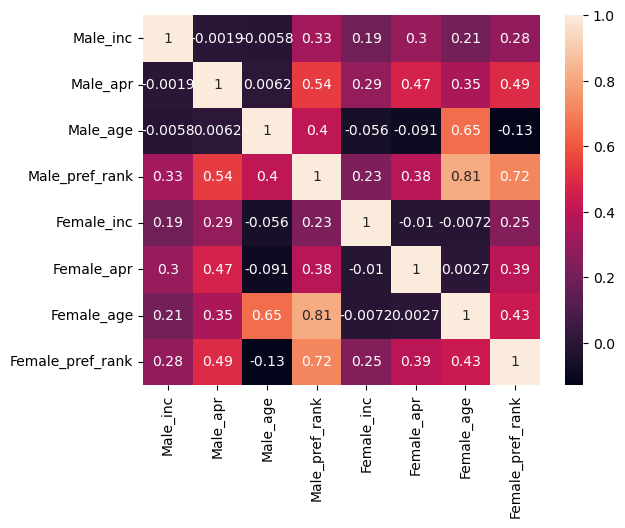

In [78]:
df_for_corr = df[["Male_inc", "Male_apr", "Male_age", "Male_pref_rank", "Female_inc", "Female_apr", "Female_age", "Female_pref_rank"]]
columns_to_negate = ["Male_age", "Male_pref_rank", "Female_age", "Female_pref_rank"]
df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]
df_corr = df_for_corr.corr()
sns.heatmap(df_corr, annot=True)

In [79]:
target_columns = ["Male_inc", "Male_apr", "Male_age", "Male_pref_rank", "Female_inc", "Female_apr", "Female_age", "Female_pref_rank"]

In [80]:
df[df["Male_inc"]==10]

,Male_inc,Male_apr,Male_age,Male_per,Female_inc,Female_apr,Female_age,Female_per,Male_pref_rank,Female_pref_rank
368,10,5,2,0.826577,2,8,1,0.772365,1,2
687,10,7,2,2.427470,4,7,1,2.394891,1,1
737,10,5,10,4.565445,2,8,8,4.758502,209,1
854,10,4,2,1.891258,2,8,2,1.714821,12,3
1111,10,4,3,7.422526,6,6,3,8.063711,27,12
...,...,...,...,...,...,...,...,...,...,...
48717,10,7,4,6.752858,6,8,3,6.891130,2,3
49095,10,6,2,9.272436,6,10,3,9.306800,1,1
49451,10,7,4,2.451163,6,8,3,3.378541,7,3
49569,10,5,4,4.374454,4,6,2,4.715063,17,11


In [81]:
df.loc[:, target_columns].groupby("Male_inc").mean()

,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_apr,Female_age,Female_pref_rank
Male_inc,,,,,,,
1,5.312338,4.204520,183.562060,3.293442,4.812523,5.015191,102.155613
2,5.307382,4.214720,161.533098,3.457620,4.930434,4.726323,85.339430
4,5.313499,4.243871,111.705647,3.810744,5.301102,4.090702,49.720248
6,5.290833,4.257013,76.392904,4.237525,5.747182,3.704186,29.292144
8,5.329914,4.222038,47.220384,4.663468,6.232296,3.274983,18.112177
10,5.229358,4.302752,33.770642,4.720183,6.582569,2.944954,14.408257


In [82]:
df.loc[:, target_columns].groupby(["Male_inc","Male_apr"]).mean()

Male_age  Male_pref_rank  Female_inc  Female_apr  \
Male_inc Male_apr                                                     
1        1         3.750000      406.000000    2.450000    4.500000   
         2         4.717949      374.794872    2.564103    4.461538   
         3         4.191781      357.821918    2.931507    4.253425   
         4         4.273292      299.091097    2.836439    4.202899   
         5         4.233296      195.229898    3.004530    4.471121   
         6         4.151286      114.314675    3.484115    5.063540   
         7         4.171875       71.381250    4.087500    5.646875   
         8         4.077778       44.633333    4.533333    6.366667   
         9         3.975610       20.390244    4.731707    6.853659   
         10        4.125000       21.812500    4.750000    7.375000   
2        1         4.180851      389.734043    3.021277    4.074468   
         2         3.878505      388.906542    2.714953    4.289720   
         3         4.133397      342.023992    2.872361    4.263916   
         4         4.177364      265.004011    2.887393    4.266476   
         5         4.245677      163.636121    3.133892    4.624710   
         6         4.226469       96.908932    3.727451    5.256825   
         7         4.263855       62.036783    4.401177    5.850417   
         8         4.223315       39.203652    4.730337    6.231742   
         9         4.145923       22.785408    5.025751    6.776824   
         10        3.895349       11.813953    5.604651    7.453488   
4        1         4.454545      379.285714    2.857143    4.285714   
         2         4.429379      338.638418    2.881356    4.322034   
         3         4.182822      272.321472    2.911656    4.207362   
         4         4.279915      172.358974    3.080128    4.542735   
         5         4.260274      107.757467    3.607456    5.082192   
         6         4.218632       68.959612    4.196554    5.689284   
         7         4.231098       44.005488    4.662805    6.215244   
         8         4.124138       25.801724    5.079310    6.703448   
         9         4.362162       17.410811    5.162162    7.167568   
         10        4.084507        8.183099    5.380282    7.380282   
6        1         3.770492      307.262295    2.672131    4.344262   
         2         4.126667      280.106667    2.840000    4.360000   
         3         4.429008      174.503817    3.167939    4.567939   
         4         4.310452      112.923384    3.602746    5.107617   
         5         4.279966       74.151160    4.134395    5.601285   
         6         4.216120       47.159415    4.624108    6.094864   
         7         4.156275       28.393054    5.033149    6.608524   
         8         4.379531       19.008529    5.144989    7.021322   
         9         3.890323        9.219355    5.580645    7.600000   
         10        3.711111        4.088889    6.066667    7.555556   
8        1         4.266667      253.800000    3.933333    3.733333   
         2         3.971429      155.342857    3.285714    4.457143   
         3         4.355932      107.237288    3.655367    5.118644   
         4         4.348432       73.560976    4.214286    5.644599   
         5         4.233297       47.480832    4.559693    6.087623   
         6         4.166667       28.289062    4.950521    6.601562   
         7         4.002786       14.465181    5.275766    6.986072   
         8         4.466165       12.789474    5.413534    7.225564   
         9         4.085714        7.228571    5.714286    7.714286   
         10        3.846154        2.153846    5.692308    8.384615   
10       1         4.750000      157.750000    4.000000    4.750000   
         2         3.000000       73.000000    4.000000    5.000000   
         3         3.900000       64.300000    3.000000    6.000000   
         4         4.773585       53.660377    4.490566    6.056604   
         5         4.075758       29.424242

In [83]:
df.loc[:, target_columns].groupby("Female_apr").mean()

,Male_inc,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_age,Female_pref_rank
Female_apr,,,,,,,
1,2.650190,3.901141,3.030418,285.429658,3.859316,4.057034,168.167300
2,2.716522,4.090435,3.293913,259.286957,3.751304,4.241739,160.907826
3,2.937237,4.348177,3.603086,211.498948,3.803296,4.245091,133.792426
4,3.252786,4.679721,3.981564,166.352984,3.830955,4.200500,97.354963
5,3.648129,5.092010,4.291439,128.844388,3.820736,4.263412,62.516424
6,4.128446,5.612411,4.432682,91.304397,3.811912,4.219195,31.766016
7,4.657471,6.162157,4.458709,64.172591,3.784439,4.221220,15.120248
8,5.106713,6.723447,4.413828,44.210421,3.720942,4.201403,6.529559
9,5.477477,7.264264,4.240240,26.391892,3.678679,4.057057,3.252252


In [84]:
df.loc[:, target_columns].groupby("Female_age").mean()

,Male_inc,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_apr,Female_pref_rank
Female_age,,,,,,,
1,4.627470,6.214427,1.916996,23.054348,3.780632,5.234190,14.677866
2,4.293380,5.760572,2.317950,38.743730,3.801108,5.309930,27.469743
3,3.926147,5.444502,3.309697,64.324242,3.805714,5.297143,43.357662
4,3.796210,5.332890,4.641290,98.598737,3.788896,5.316046,53.214650
6,3.721938,5.255442,6.905036,183.585574,3.820316,5.357448,46.513017
8,3.230692,4.563943,6.873862,284.366438,3.827698,5.272115,110.929757
10,2.743615,3.914372,5.189284,369.620931,3.865298,5.299449,228.099149
